<a href="https://colab.research.google.com/github/anoopadavis/Machine-Learning-Mini-Project/blob/master/Classification_on_Wine_Database_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT DESCRIPTION
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
The objective is to predict using KNN algorithm which farm/cultivar a wine of a given chemical properties come from.

Loading dataset

In [3]:
import pandas as pd
df = pd.read_csv('/Wine dataset - shuffled.csv')
df

,Farm,Alcohol,Mlic acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
1,3,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
2,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560
3,3,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650
4,1,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
174,1,13.83,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265
175,2,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510
176,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


Exploring dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Farm                 178 non-null    int64  
 1   Alcohol              178 non-null    float64
 2   Mlic acid            178 non-null    float64
 3   Ash                  178 non-null    float64
 4   Ash_Alcanity         178 non-null    float64
 5   Magnesium            178 non-null    int64  
 6   Total_Phenols        178 non-null    float64
 7   Flavanoids           178 non-null    float64
 8   Nonflavanoidphenols  178 non-null    float64
 9   Proanthocyanins      178 non-null    float64
 10  Color_intensity      178 non-null    float64
 11  Hue                  178 non-null    float64
 12  OD280                178 non-null    float64
 13  Proline              178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.shape

(178, 14)

In [6]:
df.describe()

,Farm,Alcohol,Mlic acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.tail()

,Farm,Alcohol,Mlic acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
173,3,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
174,1,13.83,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265
175,2,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510
176,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
177,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


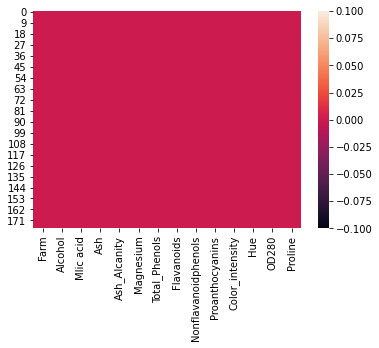

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.heatmap(df.isnull())

There are no missing values in this dataset. k = square root of 177 k = 13

In [9]:
df.columns

Index(['Farm', 'Alcohol', 'Mlic acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoidphenols', 'Proanthocyanins',
       'Color_intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [10]:
df['Farm'].unique()

array([3, 1, 2])

2    71
1    59
3    48
Name: Farm, dtype: int64


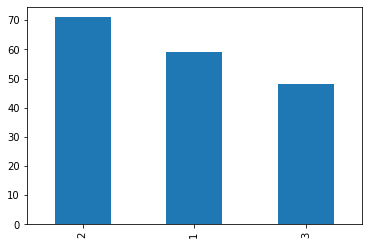

In [11]:
print(df.Farm.value_counts())
p=df.Farm.value_counts().plot(kind="bar")

Almost balanced dataset.

In [12]:
# Inputs and Output
x = df.iloc[:,1:14].values
y = df.iloc[:,0].values

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 1/4,random_state = 4)

Loading model

In [14]:
from sklearn.neighbors import KNeighborsClassifier

Using standard scalar to scale the data.


In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train =  sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [16]:
x_test

array([[-1.1539997 , -0.88366594, -0.26507816,  1.32549777, -2.30385222,
        -0.21397034, -0.48798407,  0.47356623, -0.3620946 , -1.48152702,
         0.44611426,  0.80893642, -0.39883421],
       [-1.1539997 , -0.82809735,  0.43652175,  0.98504777, -1.19509729,
         0.36713573,  0.20700319,  0.55452293, -0.97306167, -0.94896571,
        -0.18014083,  0.77980726, -1.15688993],
       [-0.60309532,  2.98761257,  0.92764168,  1.75879778, -0.24473592,
        -0.87578559, -1.47089463,  2.17365684, -0.86524395,  0.0151539 ,
        -0.6721984 , -1.40487956, -0.74627641],
       [-0.89691099, -0.80957449, -1.38763801, -1.02670228, -1.11590051,
         0.35099389,  0.41549937, -0.57887081,  0.33872058, -0.94896571,
         1.16183436,  0.12440121, -1.02107162],
       [-0.54188373, -0.92071167, -0.96667807,  0.21129775,  0.30964155,
        -1.37618249, -1.49075141,  1.36408989, -0.32615536,  1.20882581,
        -1.74577855, -1.60878366, -0.35145572],
       [ 0.92719463,  0.440718

In [17]:
x_train.shape

(133, 13)

In [18]:
x_test.shape

(45, 13)

In [19]:
x_train

array([[-0.79897244, -1.06889458, -0.7561981 , ...,  1.11710185,
         0.31374074, -1.04634014],
       [ 1.6617338 ,  1.20941766, -0.33523815, ...,  0.31191674,
         1.14392173,  0.99093463],
       [ 1.47809901, -0.53173153,  0.19096178, ...,  0.31191674,
         1.84302151,  0.99093463],
       ...,
       [ 1.39240277,  0.20918302,  0.36636176, ..., -1.56684852,
        -1.3757504 , -0.28828441],
       [ 0.98840622, -0.58730012,  0.7873217 , ...,  1.20656686,
         1.04196968,  1.62264773],
       [-1.97423512, -1.43009042,  0.43652175, ...,  0.58031178,
        -0.50187567, -1.00212022]])

Fitting model

In [20]:
model = KNeighborsClassifier(n_neighbors=13)

In [21]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

Accuracy score

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

91.11111111111111

Checking for a value

In [23]:
y_check = model.predict([x_test[0]])
y_check

array([2])

In [24]:
y_test[0]

2

The prediction is correct in this case

Confusion matrix and classification report

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 4, 14,  0],
       [ 0,  0, 16]])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       1.00      0.78      0.88        18
           3       1.00      1.00      1.00        16

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



The classification report is also satisfactory